### Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

### Loading Data

Dataset Link : https://www.kaggle.com/arshid/iris-flower-dataset

In [2]:
d = pd.read_csv("IRIS.csv")

In [3]:
d

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Understanding Data 

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
d.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
d.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Data Cleaning

In [7]:
d["species"].replace({'Iris-setosa':'0', 'Iris-versicolor':'1', 'Iris-virginica':'2'}, inplace = True)

In [8]:
d

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Data Visualization

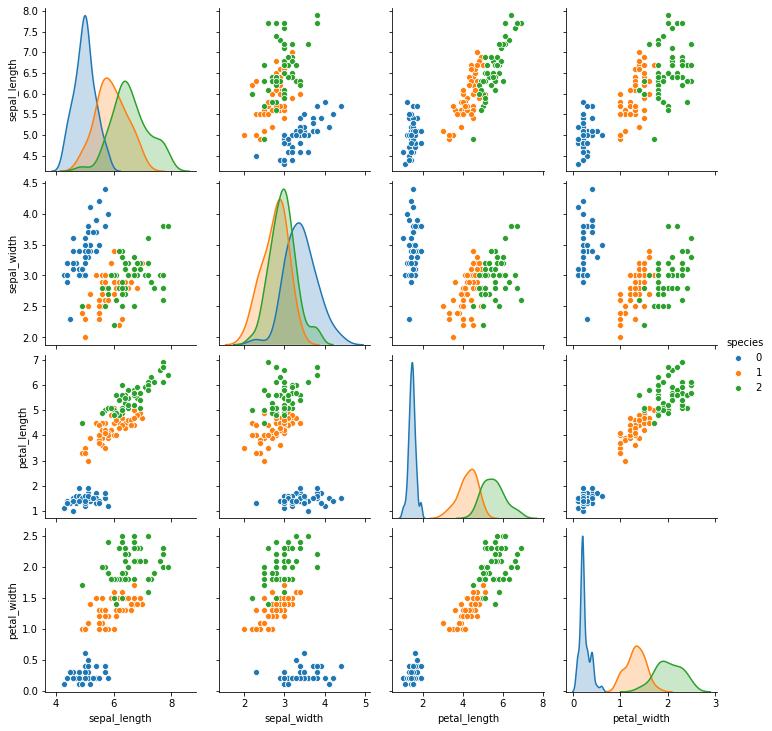

In [9]:
import seaborn as sns
sns.pairplot(d,hue = 'species')

### Feature and Lable set

In [10]:
X = d.drop(['species'], axis = 1)
Y = d['species']

### Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


### Modeling

In [12]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression()
m.fit(x_train, y_train)

LogisticRegression()

### Accuracy

In [13]:
m.score(x_test, y_test)

0.9666666666666667

In [14]:
from sklearn import metrics
print("Model Accuracy :", metrics.accuracy_score(y_test, m.predict(x_test)))

Model Accuracy : 0.9666666666666667


### Visualization with Confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, m.predict(x_test))
cm

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

Text(69.0, 0.5, 'Truth')

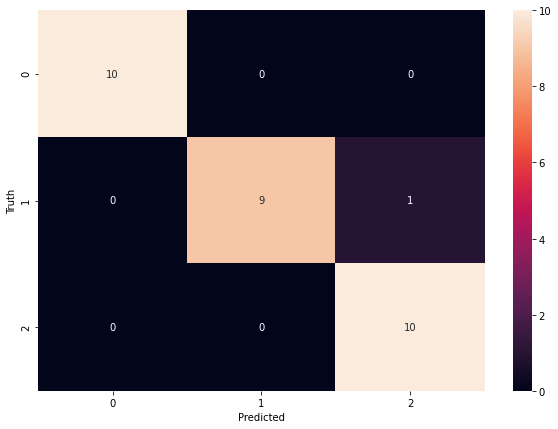

In [16]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")